In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -1.0, 2.0            # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [3]:
# source locations and strengths for NACA0012 foil
x_source = np.loadtxt("resources/NACA0012_x.txt")
y_source = np.loadtxt("resources/NACA0012_y.txt")
sigma_source = np.loadtxt("resources/NACA0012_sigma.txt")

In [4]:
# freestream velocity in x-direction
u_inf = 1.0

# computes the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# computes the stream-function
psi_freestream = u_inf * Y

In [5]:
# function to get source velocity

def get_velocity(strength, xs, ys, X, Y):
    """Returns the velocity field generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [6]:
# function to get scource stream function

def get_stream_function(strength, xs, ys, X, Y):
    """Returns the stream-function generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    psi = strength/(2*np.pi)*np.arctan2((Y-ys), (X-xs))
    
    return psi

In [7]:
# loop through source x and y locations and strengths to compute source velocities of airfoil

USOURCE_AIRFOIL , VSOURCE_AIRFOIL = 0, 0
for s, i, j in zip(sigma_source, x_source, y_source):
    u_source_airfoil, v_source_airfoil = get_velocity(s, i, j, X, Y)
    USOURCE_AIRFOIL = USOURCE_AIRFOIL + u_source_airfoil
    VSOURCE_AIRFOIL = VSOURCE_AIRFOIL + v_source_airfoil

In [8]:
# loop through source x and y locations and strengths to compute source stream function of airfoil

PSISOURCE_AIRFOIL = 0

for s, i, j in zip(sigma_source, x_source, y_source):
    
    psi_source_airfoil = get_stream_function(s, i, j, X, Y)
    PSISOURCE_AIRFOIL = PSISOURCE_AIRFOIL + psi_source_airfoil

In [9]:
# superposition of the source on the freestream
u = u_freestream + USOURCE_AIRFOIL
v = v_freestream + VSOURCE_AIRFOIL
psi = psi_freestream + PSISOURCE_AIRFOIL

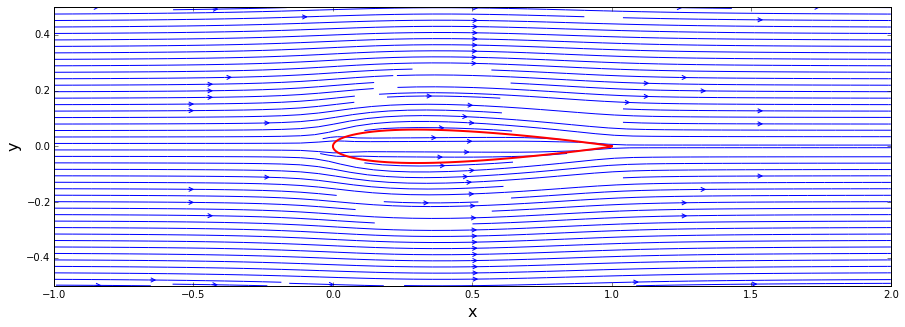

In [10]:
# plots the streamlines

size = 15
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
plt.plot(x_source, y_source, 'r-', linewidth=2);

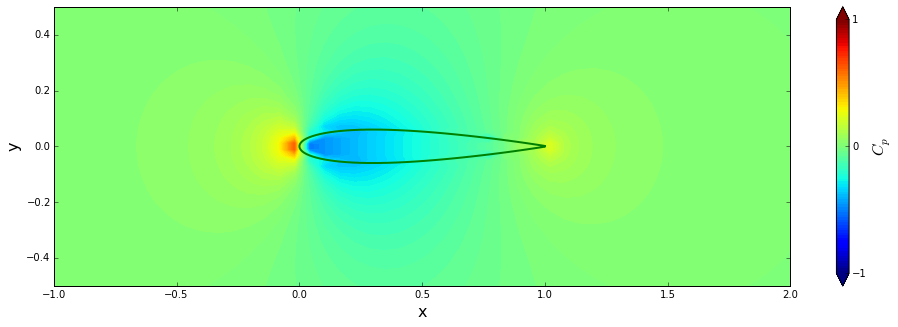

In [11]:
# computes the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plots the pressure coefficient field
size = 15
plt.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp, levels=np.linspace(-1.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])
plt.plot(x_source, y_source, 'g-', linewidth=2)
#plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

### Calculate maximum pressure coefficient

In [12]:
np.amax(cp)

0.61038063610047444